## Phase 3 Project - Customer Churn Analysis


Student name: Charles EGAMBI

Student pace: Part Time

Instructor name: William Okomba and Noah Kandie

### INTRODUCTION

SyriaTel is a telecommunications company in Syria. They have been informed that some of their customers have started to churn, discontinue their service. This analysis will determine what features will indicate if a customer will ("soon") discontinue their service.

In this report, a dataset on churn data of a Telecom company is analysed. It can be found here: https://www.kaggle.com/becksddf/churn-in-telecoms-dataset.

### BUSINESS UNDERSTANDING
In the highly competitive telecom industry, customer churn represents a critical challenge that directly impacts profitability and market share. The dataset under analysis offers essential insights into customer behavior, helping to identify the key factors influencing churn. By utilizing predictive analytics, telecom companies can proactively mitigate customer attrition, thereby optimizing retention strategies and improving overall business performance.

### PROBLEM STATEMENT
The objective of this analysis is to develop a predictive model to anticipate customer churn in the telecom sector. By leveraging supervised classification techniques, we aim to identify key attributes and patterns that indicate potential churn among telecom customers. Accurate churn prediction will enable telecom companies to implement targeted retention initiatives, such as personalized offers and proactive customer service interventions, ultimately reducing customer attrition and fostering long-term customer loyalty.

### DATA UNDERSTANDING

Customer Churn indicates if a customer has terminated their contract with SyriaTel. Predicting churn can help a telecom company focus its customer retention marketing efforts (such as providing special offers) on the subset of clients most likely to switch service providers. Therefore, the “churn” column has been chosen as the target variable for this predictive analysis, which is a supervised classification problem.

**Target Variable** - churn

**Unique identifier** - phone number

### OBJECTIVES
**Main Objective:**

Our primary objective is to accurately identify customers who are likely to churn. By leveraging advanced predictive analytics and machine learning techniques, we aim to enable the implementation of targeted, special-purpose marketing strategies designed to preemptively address and mitigate churn events, thereby fostering customer retention and long-term loyalty.

### TABLE OF CONTENTS
1.   Data Exploration 
2.   Data cleaning
1.   Data Preprocessing
2.   Modelling
1.   Regression Results
2.   Conclusion
1.   Recommendations

### **1. DATA EXPLORATION**

In [1]:
# Import modules & packages

# Data manipulation 
import pandas as pd 
import numpy as np 

# Data visualization
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px 

# Modeling
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV # splitting the dataset into test-train
from imblearn.over_sampling import SMOTE # SMOTE technique to deal with unbalanced data problem
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, roc_curve, roc_auc_score, classification_report # performance metrics
from sklearn.preprocessing import MinMaxScaler # to scale the numeric features
from scipy import stats

# Feature Selection, XAI, Feature Importance
import shap # !pip install shap
from sklearn.inspection import permutation_importance
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.feature_selection import SelectFromModel

# Algorithms for supervised learning methods
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Filtering future warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install --upgrade scikit-learn
!pip install --upgrade imbalanced-learn

In [3]:
# Import Data and create dataframe. Print the first 5 rows.

df = pd.read_csv('churn_in_telecoms.csv')
df.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

In [4]:
# Checking the shape of the dataframe 
df.shape

(3333, 21)

The dataset has 3333 Rows and 21 columns.

### **2. STATISTICAL ANALYSIS**

In [5]:
df.describe() # Concise statistical description of numeric features

account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       total eve charge  total night minutes  total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       total night charge  total intl minutes  total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       total intl charge  customer service calls  
count        3333.000000             3333.000000  
mean            2.764581                1.562856  
std             0.753773                1.315491  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.780000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

### **3. DATA CLEANING**
Checking the Dataset for:
* duplicated rows
* missing values
* irrelevant columns as they may not add to the analysis

In [6]:
# Checking for duplicates:
df.duplicated().sum()

0

We can clearly see that there are no Duplicates

In [7]:
# Checking the Dataset for missing/null values:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

The dataset does not contain any missing or null values

In [8]:
# Remove 'phone number' feature, since it does not help in predicting 'churn'
# Recheck dataframe
df.drop(['phone number'],axis=1,inplace=True)
df.head()

state  account length  area code international plan voice mail plan  \
0    KS             128        415                 no             yes   
1    OH             107        415                 no             yes   
2    NJ             137        415                 no              no   
3    OH              84        408                yes              no   
4    OK              75        415                yes              no   

   number vmail messages  total day minutes  total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   total day charge  total eve minutes  total eve calls  total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

### **4. EXPLORATORY DATA ANALYSIS**

In [9]:
# Checking for unique values:
df.nunique()

state                       51
account length             212
area code                    3
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

### Feature Types

#### Continuous (Numeric):
* account length
* number vmail messages
* total day minutes
* total day calls
* total day charge
* total eve minutes
* total eve calls
* total eve charge
* total night minutes 
* total night calls
* total night charge
* total intl minutes
* total intl charge
* customer service calls

#### Categorical Features:
* state
* area code
* international plan
* voicemail plan

In [10]:
# Creating Numerical and Categorical lists

numerical_cols = ['account length','number vmail messages','total day minutes','total day calls','total day charge',
                'total eve minutes','total eve calls','total eve charge','total night minutes','total night calls',
                'total night charge','total intl minutes','total intl calls','total intl charge','customer service calls']

categorical_cols = ['state','area code','international plan','voice mail plan']

### **5. FEATURE ANALYSIS (Churn)**

* Churn indicates if a customer has terminated his or her contract with SyriaTel. 
* True indicates contract terminated and False indicates contract not terminated. 
* The target variable Churn is a binary variable, hence we'll be solving a CLASSIFICATION problem.
* Let's take a look at distribution of churn.

churn
False    2850
True      483
Name: count, dtype: int64


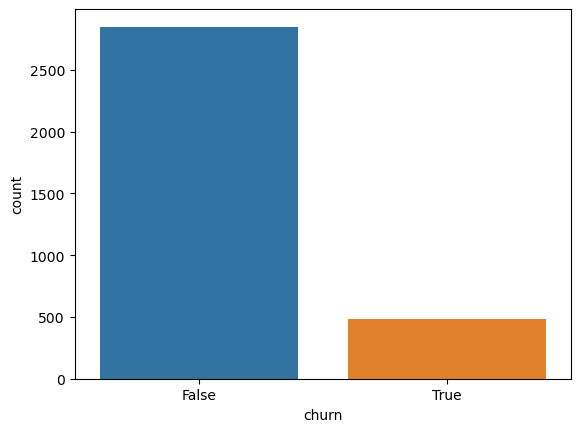

In [11]:
# Countplot of churn feature
print(df.churn.value_counts())
sns.countplot(data=df, x='churn');

* Out of the 3,333 customers in the dataset, 483 have terminated their contract, translating to about 14.5% of customers lost. 
* The distribution of the binary classes shows a data imbalance. This needs to be addressed before modeling as an unbalanced feature can cause the model to make false predictions.

### **6. UNIVARIATE, BIVARIATE AND MULTIVARIATE ANALYSIS**

### Analysis on "area code" 

In [12]:
# Pie chart of area code feature
area = df['area code'].value_counts()
transuction = area.index
quantity = area.values

# draw pie circule with plotly
figure = px.pie(df,
               values = quantity,
               names = transuction,
               hole = .5,
               title = 'Distribution of Area Code Feature')
figure.show()

We can clearly see that:
* About Half of the customers have the area code 415. 
* A quarter of customers have the area code 510 
* A quarter of the customers have the area code 408.

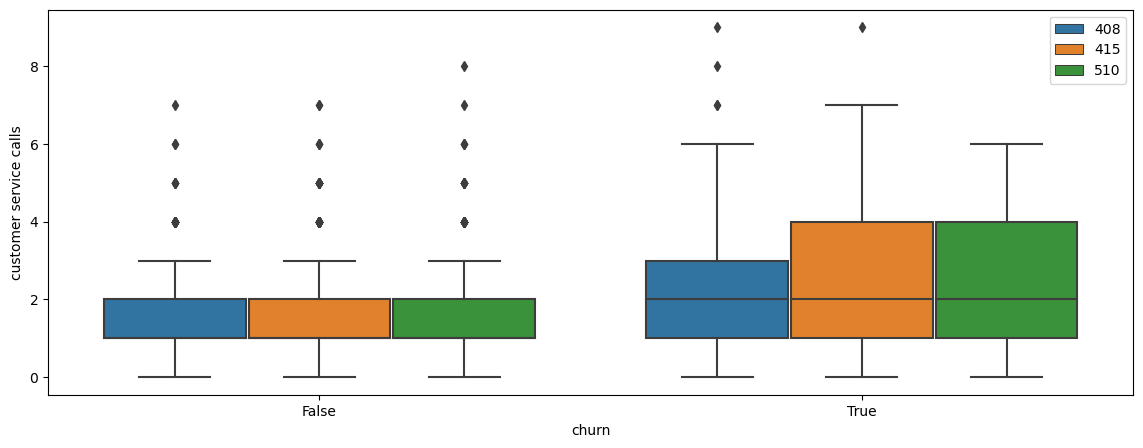

In [13]:
# Boxplot to see which area code has the highest churn
plt.figure(figsize=(14,5))
sns.boxplot(data=df,x='churn',y='customer service calls',hue='area code');
plt.legend(loc='upper right');

* There are some existing outliers, in all area codes, amongst the customers who have not terminated their contracts. 
* Of the customers who have terminated their contracts, they more likely have a 415 or a 510 area code. 

### Distrubution Plots for Numeric Features

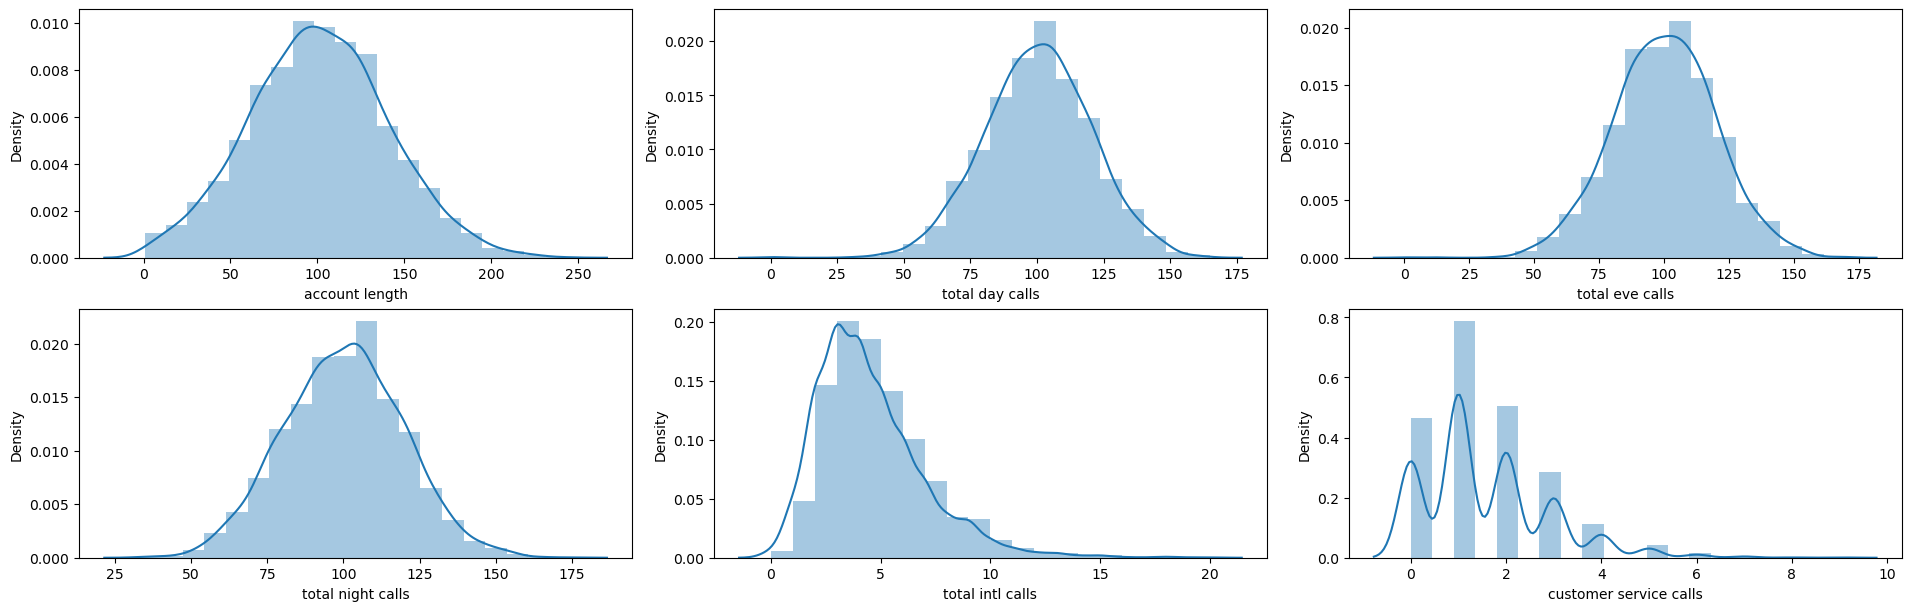

In [14]:
f,ax=plt.subplots(2,3,figsize=(19,6),constrained_layout = True)
sns.distplot(df["account length"],bins=20,ax=ax[0,0]);

sns.distplot(df["total day calls"],bins=20,ax=ax[0,1]);

sns.distplot(df["total eve calls"],bins=20,ax=ax[0,2]);

sns.distplot(df["total night calls"],bins=20,ax=ax[1,0]);

sns.distplot(df["total intl calls"],bins=20,ax=ax[1,1]);

sns.distplot(df["customer service calls"],bins=20,ax=ax[1,2]);

* From the distribution plots, all of the features apart from customer service calls, have a normal distribution. Although total international calls appears skewed to the right, it still maintains a normal distribution pattern.
* Customer service calls has multiple peaks, indicating several modes in the population. 

### Pairplots for Numeric Features (Hue as "Churn")

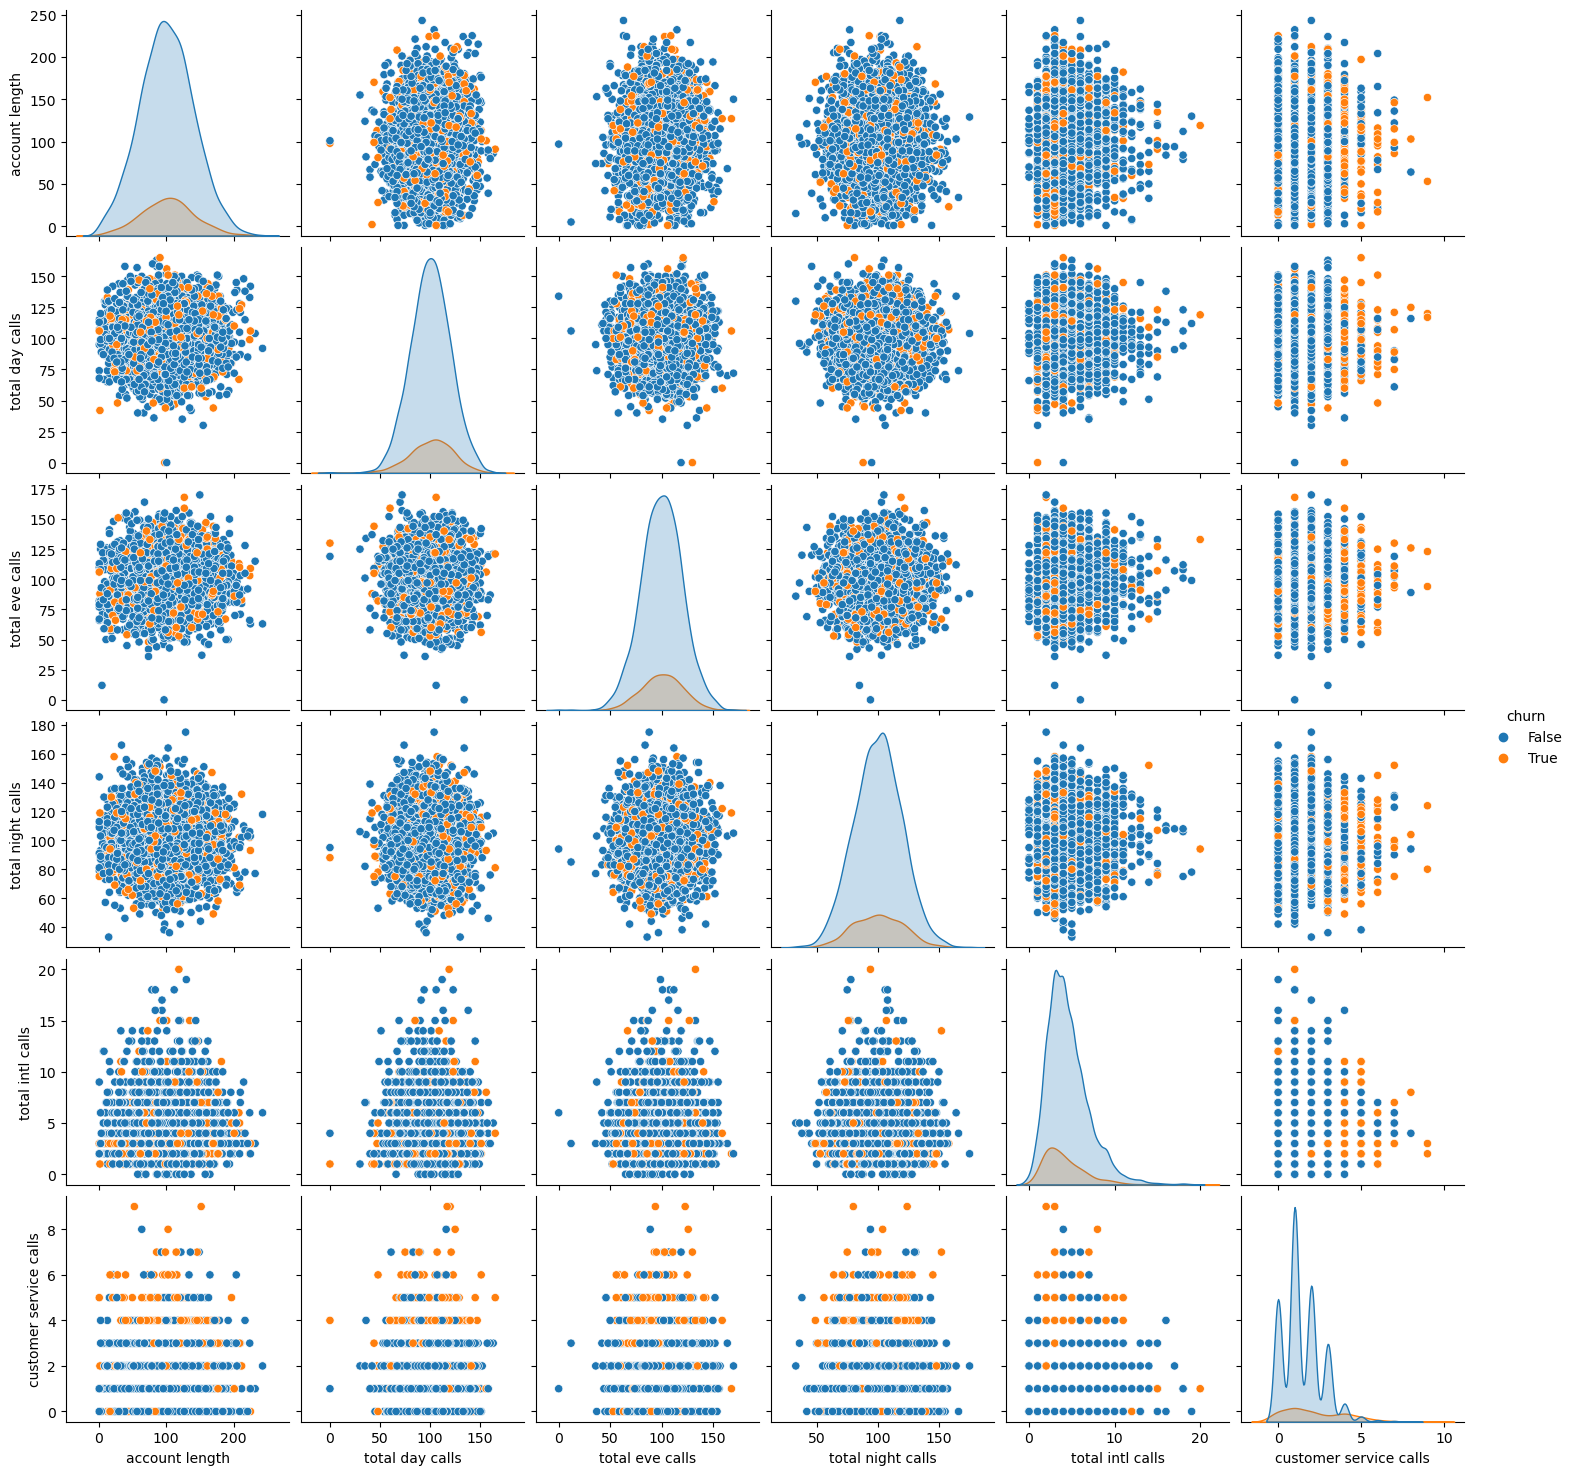

In [15]:
data_temp = df[["account length","total day calls","total eve calls","total night calls",
                "total intl calls","customer service calls","churn"]]
sns.pairplot(data_temp, hue="churn",height=2.5);
plt.show();

* There appears to be a clear relationship between customer service calls and true churn values. After 4 calls, customers are a lot more likely to discontinue their service.

### Correlation Heatmap for Numeric Features

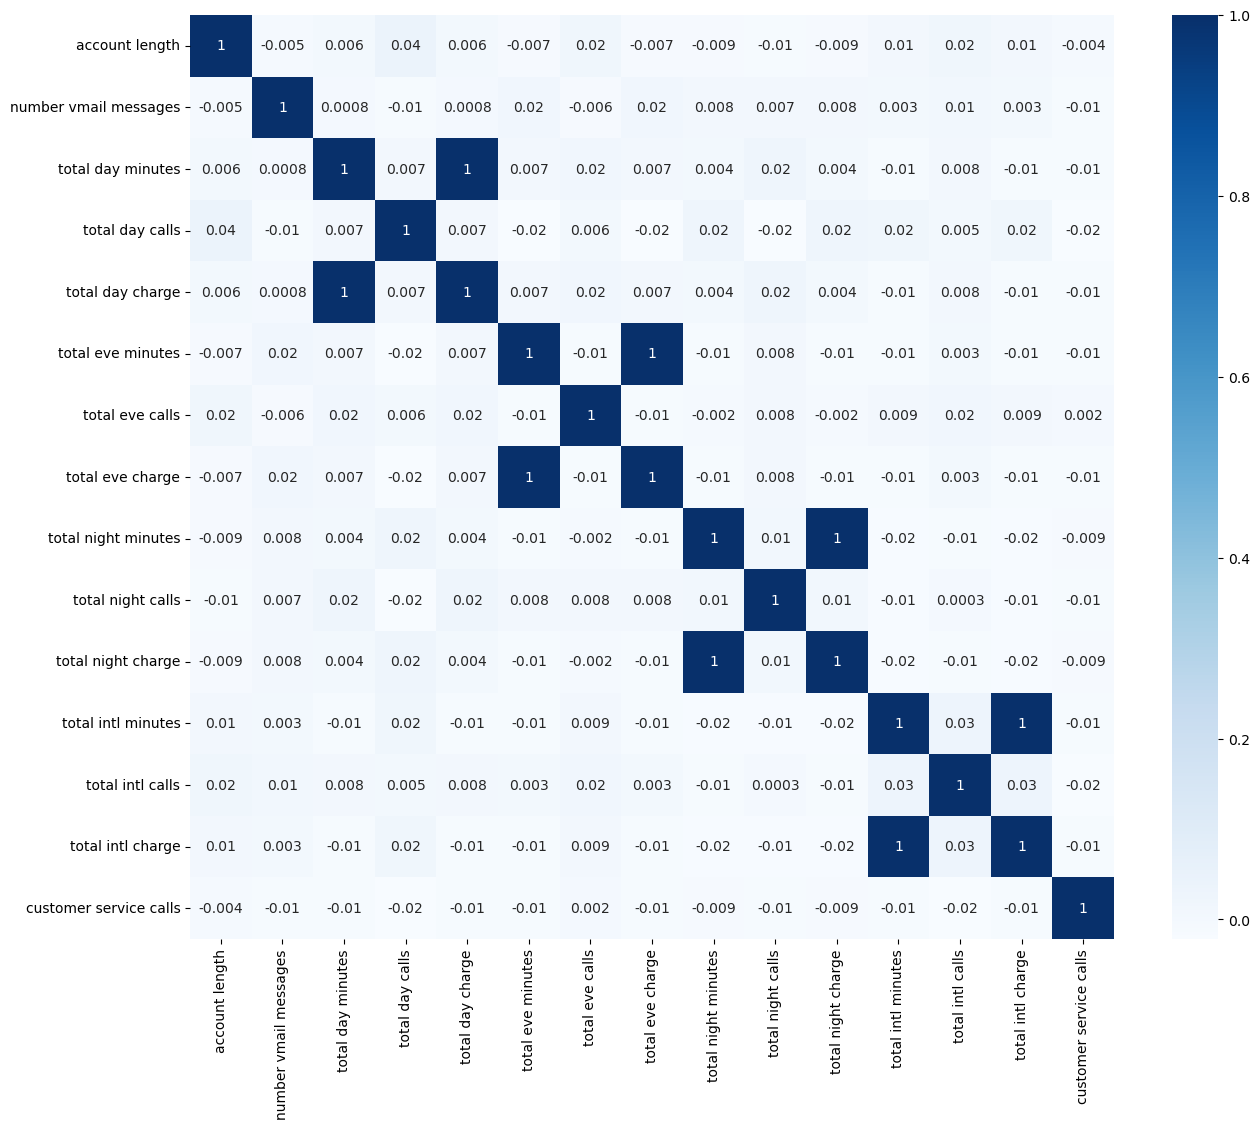

In [16]:
corr_mat = df[numerical_cols].corr()
mask = np.triu(np.ones_like(corr_mat, dtype=bool))
plt.subplots(figsize=(15,12))
sns.heatmap(corr_mat, annot=True, cmap='Blues', square=True,fmt='.0g');
plt.xticks(rotation=90);
plt.yticks(rotation=0);

* Most of the features are not correlated however some have a perfect correlation:
    * Total day charge and total day minutes are perfectly positively correlated. 
    * Total eve charge and total eve minutes are perfectly positively correlated.
    * Total night charge and total night minutes are perfectly positively correlated. 
    * Total int charge and total int minutes are perfectly positively correlated. 

* This makes sense because the charge is directly proportional to the minutes used.   
* The perfect correlation of 1 indicates perfect multicollinearity. 

### Categorical Features Analysis

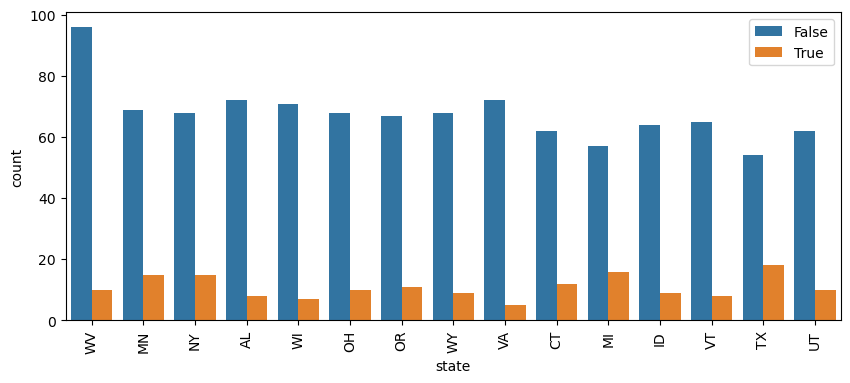

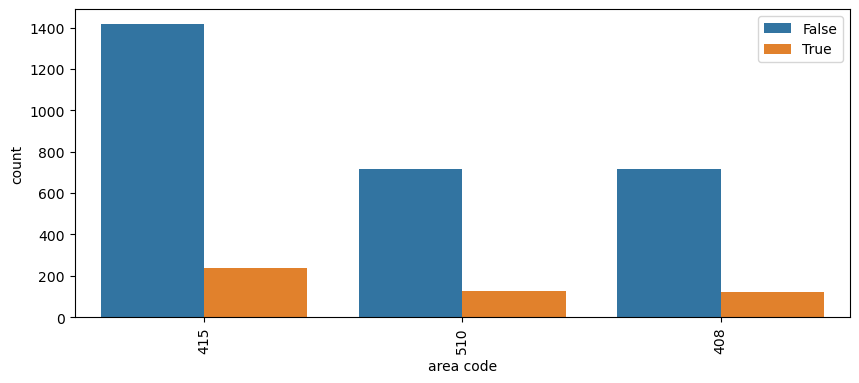

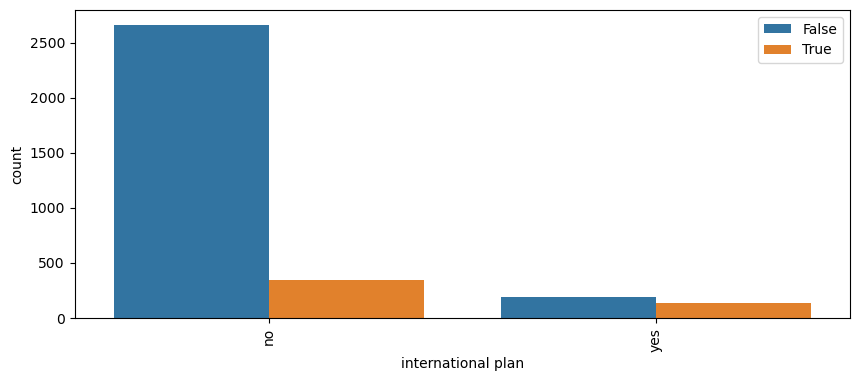

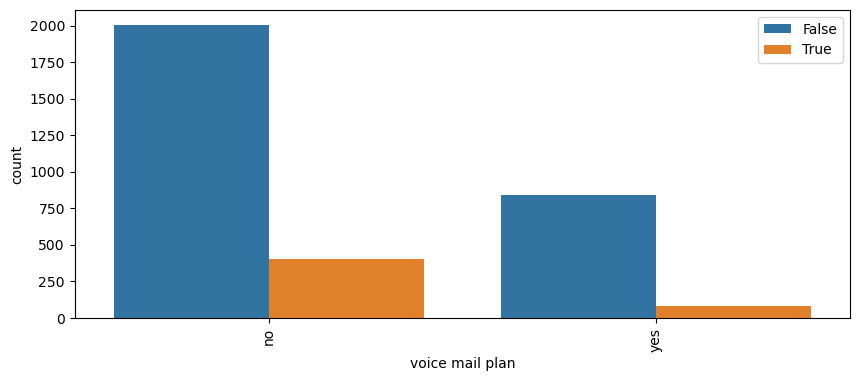

In [17]:
for i in categorical_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(x=i, hue="churn", data=df,order= df[i].value_counts().iloc[0:15].index)
    plt.xticks(rotation=90)
    plt.legend(loc="upper right")
    plt.show()

### Handling Outliers
* Dropping outliers past 3 standard deviations. 

In [18]:
print("Before dropping numerical outliers, length of the dataframe is: ",len(df))
def drop_numerical_outliers(df, z_thresh=3):
    constrains = df.select_dtypes(include=[np.number]).apply(lambda x: np.abs(stats.zscore(x)) < z_thresh) \
        .all(axis=1)
    df.drop(df.index[~constrains], inplace=True)
    
drop_numerical_outliers(df)
print("After dropping numerical outliers, length of the dataframe is: ",len(df))

Before dropping numerical outliers, length of the dataframe is:  3333
After dropping numerical outliers, length of the dataframe is:  3169


### Dropping Highly-Correlated Features
* Dropping features that have a correlation of 0.9 or above. 

The original dataframe has 20 columns.


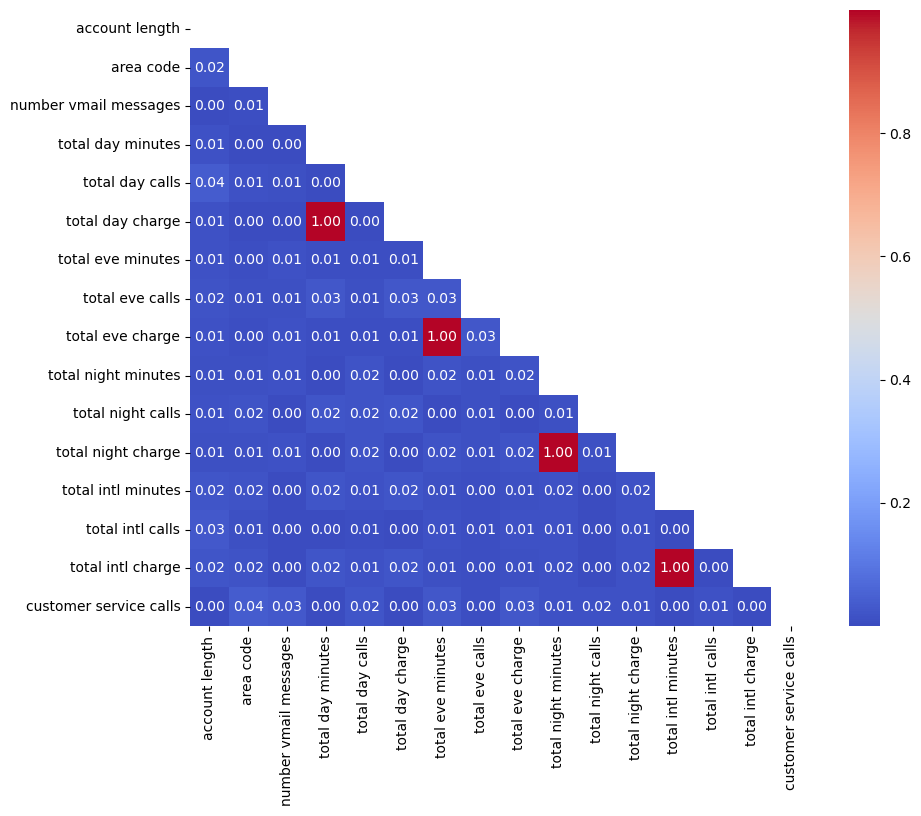

The reduced dataframe has 16 columns.


In [19]:
print("The original dataframe has {} columns.".format(df.shape[1]))

# Select only the numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix and take the absolute value
corr_matrix = numeric_df.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.90)
to_drop = [c for c in tri_df.columns if any(tri_df[c] >  0.90)]

reduced_df = df.drop(to_drop, axis=1) # Drop the features
print("The reduced dataframe has {} columns.".format(reduced_df.shape[1]))

### **7. DATA PREPROCESSING**

#### **international plan**, **voice mail plan** are binary features. We will do the Mapping: yes $\rightarrow$ 1 and no $\rightarrow$ 0.

In [20]:
df['churn'].value_counts()

churn
False    2727
True      442
Name: count, dtype: int64

In [21]:
df['churn'] = df['churn'].map({True: 1, False: 0}).astype('int') 
df.head()

state  account length  area code international plan voice mail plan  \
0    KS             128        415                 no             yes   
1    OH             107        415                 no             yes   
2    NJ             137        415                 no              no   
3    OH              84        408                yes              no   
4    OK              75        415                yes              no   

   number vmail messages  total day minutes  total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   total day charge  total eve minutes  total eve calls  total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1      0  
1                       1      0  
2                       0      0  
3                       2      0  
4                       3      0

### One-Hot Encoding
* Transforming categorical features into dummy variables as 0 and 1 to be able to use them in classification models.

In [22]:
dummy_df_state = pd.get_dummies(reduced_df["state"],dtype=np.int64,prefix="state_is")
dummy_df_area_code = pd.get_dummies(reduced_df["area code"],dtype=np.int64,prefix="area_code_is")
dummy_df_international_plan = pd.get_dummies(reduced_df["international plan"],dtype=np.int64,prefix="international_plan_is",drop_first = True)
dummy_df_voice_mail_plan = pd.get_dummies(reduced_df["voice mail plan"],dtype=np.int64,prefix="voice_mail_plan_is",drop_first = True)


reduced_df = pd.concat([reduced_df,dummy_df_state,dummy_df_area_code,dummy_df_international_plan,dummy_df_voice_mail_plan],axis=1)
reduced_df = reduced_df.loc[:,~reduced_df.columns.duplicated()]
reduced_df = reduced_df.drop(['state','area code','international plan','voice mail plan'],axis=1)

reduced_df.head()

account length  number vmail messages  total day calls  total day charge  \
0             128                     25              110             45.07   
1             107                     26              123             27.47   
2             137                      0              114             41.38   
3              84                      0               71             50.90   
4              75                      0              113             28.34   

   total eve calls  total eve charge  total night calls  total night charge  \
0               99             16.78                 91               11.01   
1              103             16.62                103               11.45   
2              110             10.30                104                7.32   
3               88              5.26                 89                8.86   
4              122             12.61                121                8.41   

   total intl calls  total intl charge  ...  state_is_VT  state_is_WA  \
0                 3               2.70  ...            0            0   
1                 3               3.70  ...            0            0   
2                 5               3.29  ...            0            0   
3                 7               1.78  ...            0            0   
4                 3               2.73  ...            0            0   

   state_is_WI  state_is_WV  state_is_WY  area_code_is_408  area_code_is_415  \
0            0            0            0                 0                 1   
1            0            0            0                 0                 1   
2            0            0            0                 0                 1   
3            0            0            0                 1                 0   
4            0            0            0                 0                 1   

   area_code_is_510  international_plan_is_yes  voice_mail_plan_is_yes  
0                 0                          0                       1  
1                 0                          0                       1  
2                 0                          0                       0  
3                 0                          1                       0  
4                 0                          1                       0  

[5 rows x 68 columns]

### **8. SCALING**

### Scaling Numerical Features
* We will apply MinMaxScaler in order to reduce the effects of outliers in the dataset. 

In [23]:
transformer = MinMaxScaler()

def scaling(columns):
    return transformer.fit_transform(reduced_df[columns].values.reshape(-1,1))

for i in reduced_df.select_dtypes(include=[np.number]).columns:
    reduced_df[i] = scaling(i)
reduced_df.head()

account length  number vmail messages  total day calls  total day charge  \
0        0.587963               0.510204         0.576271          0.773956   
1        0.490741               0.530612         0.686441          0.450248   
2        0.629630               0.000000         0.610169          0.706088   
3        0.384259               0.000000         0.245763          0.881184   
4        0.342593               0.000000         0.601695          0.466250   

   total eve calls  total eve charge  total night calls  total night charge  \
0         0.487179          0.490082           0.422414            0.643644   
1         0.521368          0.483858           0.525862            0.675974   
2         0.581197          0.238040           0.534483            0.372520   
3         0.393162          0.042007           0.405172            0.485672   
4         0.683761          0.327888           0.681034            0.452608   

   total intl calls  total intl charge  ...  state_is_VT  state_is_WA  \
0               0.2           0.487585  ...          0.0          0.0   
1               0.2           0.713318  ...          0.0          0.0   
2               0.4           0.620767  ...          0.0          0.0   
3               0.6           0.279910  ...          0.0          0.0   
4               0.2           0.494357  ...          0.0          0.0   

   state_is_WI  state_is_WV  state_is_WY  area_code_is_408  area_code_is_415  \
0          0.0          0.0          0.0               0.0               1.0   
1          0.0          0.0          0.0               0.0               1.0   
2          0.0          0.0          0.0               0.0               1.0   
3          0.0          0.0          0.0               1.0               0.0   
4          0.0          0.0          0.0               0.0               1.0   

   area_code_is_510  international_plan_is_yes  voice_mail_plan_is_yes  
0               0.0                        0.0                     1.0  
1               0.0                        0.0                     1.0  
2               0.0                        0.0                     0.0  
3               0.0                        1.0                     0.0  
4               0.0                        1.0                     0.0  

[5 rows x 68 columns]

### Train-Test Split
* We will split the dataset into training at 75% and testing at 25% 

In [24]:
X=reduced_df.drop(['churn'],axis=1)
y=reduced_df['churn']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=123)

### Applying SMOTE Technique to address Overfitting

In [25]:
reduced_df.churn.value_counts()

churn
False    2727
True      442
Name: count, dtype: int64

In [26]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(k_neighbors=5, random_state=123)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)
print('Before OverSampling, the shape of X_train: {}'.format(X_train.shape))
print('Before OverSampling, the shape of y_train: {}'.format(y_train.shape)) 
print('After OverSampling, the shape of X_train_over: {}'.format(X_train_over.shape))
print('After OverSampling, the shape of y_train_over: {}'.format(y_train_over.shape))

Before OverSampling, the shape of X_train: (2376, 67)
Before OverSampling, the shape of y_train: (2376,)
After OverSampling, the shape of X_train_over: (4126, 67)
After OverSampling, the shape of y_train_over: (4126,)


In [27]:
y_train_over.value_counts()

churn
False    2063
True     2063
Name: count, dtype: int64

In [28]:
churn = reduced_df['churn'].value_counts()
transuction = churn.index
quantity = churn.values

# draw pie circule with plotly
figure = px.pie(y_train_over,
               values = quantity,
               names = transuction,
               hole = .5,
               title = 'Distribution of Churn - Before SMOTE')
figure.show()

In [29]:
y_train_over_df = y_train_over.to_frame()
churn = y_train_over_df['churn'].value_counts()
transuction = churn.index
quantity = churn.values

# draw pie circule with plotly
figure = px.pie(y_train_over_df,
               values = quantity,
               names = transuction,
               hole = .5,
               title = 'Distribution of Churn - After SMOTE')
figure.show()

### **9. DATA MODELLING**

### Model 1 - Logistic Regression Model

In [30]:
# Object creation, fitting the data and getting predictions 
lr= LogisticRegression()
lr.fit(X_train_over,y_train_over) 
y_pred_lr = lr.predict(X_test) 

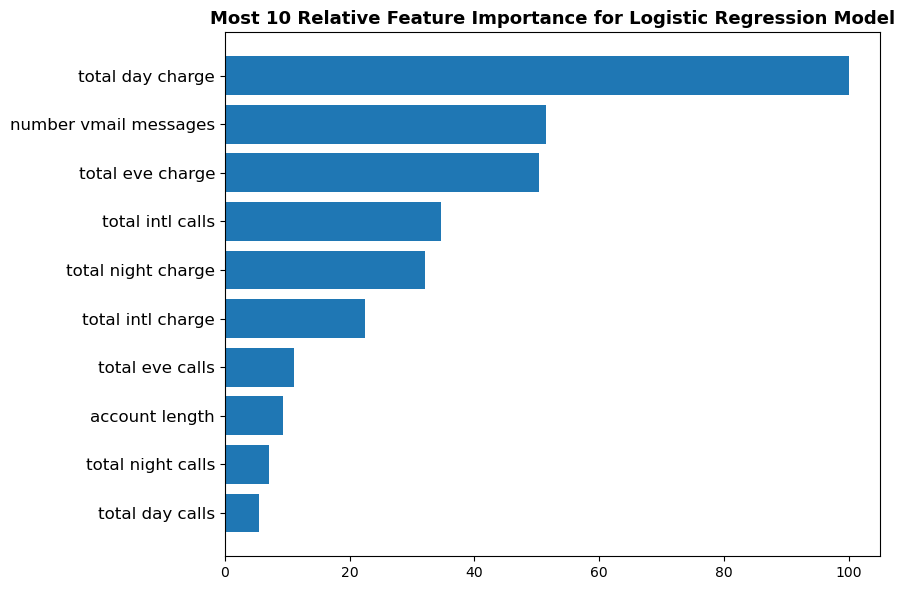

In [31]:
# Feature Importances
feature_importance = abs(lr.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())[0:10]
sorted_idx = np.argsort(feature_importance)[0:10]
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(9, 6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
plt.title('Most 10 Relative Feature Importance for Logistic Regression Model', fontsize=13, fontweight='bold')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=12)

plt.tight_layout()
plt.show()

In [32]:
print(classification_report(y_test, y_pred_lr, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.94      0.77      0.85       664
           1       0.38      0.73      0.50       129

    accuracy                           0.77       793
   macro avg       0.66      0.75      0.67       793
weighted avg       0.85      0.77      0.79       793



**************** LOGISTIC REGRESSION CLASSIFIER MODEL RESULTS **************** 
Accuracy score for testing set:  0.76545
F1 score for testing set:  0.50267
Recall score for testing set:  0.72868
Precision score for testing set:  0.38367


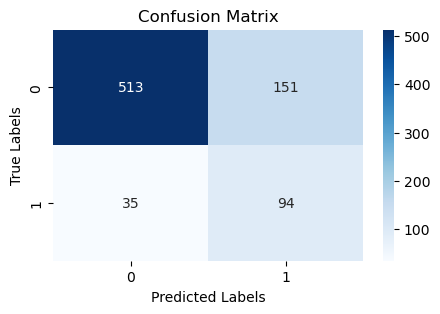

In [33]:
print("**************** LOGISTIC REGRESSION CLASSIFIER MODEL RESULTS **************** ")
print('Accuracy score for testing set: ',round(accuracy_score(y_test,y_pred_lr),5))
print('F1 score for testing set: ',round(f1_score(y_test,y_pred_lr),5))
print('Recall score for testing set: ',round(recall_score(y_test,y_pred_lr),5))
print('Precision score for testing set: ',round(precision_score(y_test,y_pred_lr),5))
cm_lr = confusion_matrix(y_test, y_pred_lr)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm_lr, annot=True, cmap='Blues', fmt='g', ax=ax)
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show();

* According to the logistic regression classifier model, total day charge, number of voicemail messages and total evening charge are the top three important features.
* Model accuracy is 76.5%, which is not bad. F1 score is only 50.2% which means the test will only be accurate half the times it is run. 

### Model 2 - Random Forest Model

In [34]:
# Object creation, fitting the data & getting predictions 
rf_model_final = RandomForestClassifier() 
rf_model_final.fit(X_train_over,y_train_over) 
y_pred_rf = rf_model_final.predict(X_test)

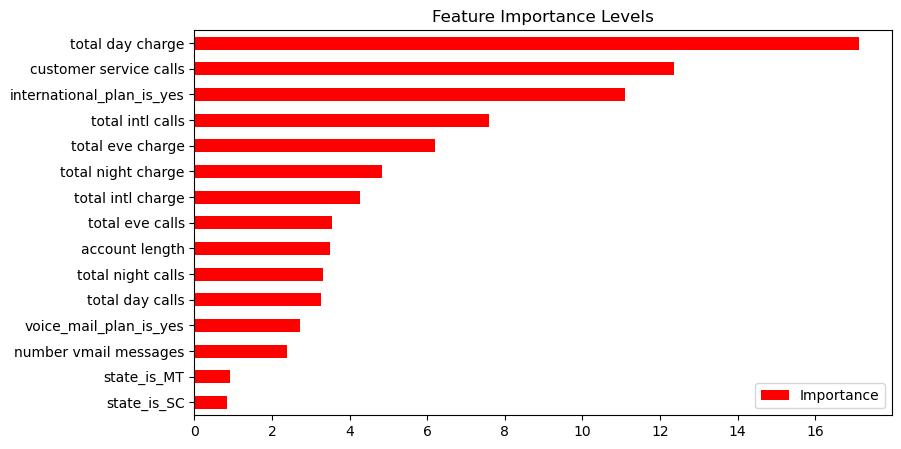

In [35]:
Importance =pd.DataFrame({"Importance": rf_model_final.feature_importances_*100},index = X_train_over.columns)
Importance.sort_values(by = "Importance", axis = 0, ascending = True).tail(15).plot(kind ="barh", color = "r",figsize=(9, 5))
plt.title("Feature Importance Levels");
plt.show()

In [36]:
print(classification_report(y_test, y_pred_rf, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       664
           1       0.78      0.72      0.75       129

    accuracy                           0.92       793
   macro avg       0.86      0.84      0.85       793
weighted avg       0.92      0.92      0.92       793



**************** RANDOM FOREST MODEL RESULTS **************** 
Accuracy score for testing set:  0.92182
F1 score for testing set:  0.75
Recall score for testing set:  0.72093
Precision score for testing set:  0.78151


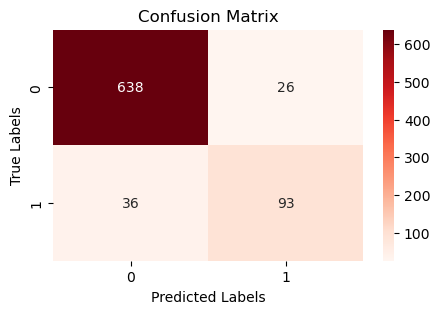

In [37]:
print("**************** RANDOM FOREST MODEL RESULTS **************** ")
print('Accuracy score for testing set: ',round(accuracy_score(y_test,y_pred_rf),5))
print('F1 score for testing set: ',round(f1_score(y_test,y_pred_rf),5))
print('Recall score for testing set: ',round(recall_score(y_test,y_pred_rf),5))
print('Precision score for testing set: ',round(precision_score(y_test,y_pred_rf),5))
cm_rf = confusion_matrix(y_test, y_pred_rf)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm_rf, annot=True, cmap='Reds', fmt='g', ax=ax)
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show();

* According to the random forest classifier; 'total day charge', 'customer service calls' and 'international plan' features have the highest impact on the model. 
* Accuracy and F1 score are much higher than the Logistics Regression Model

### Model 3 - Decision Tree Classifier

In [38]:
# Object creation, fitting the data and getting predictions
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_over,y_train_over)
y_pred_dt = decision_tree.predict(X_test)

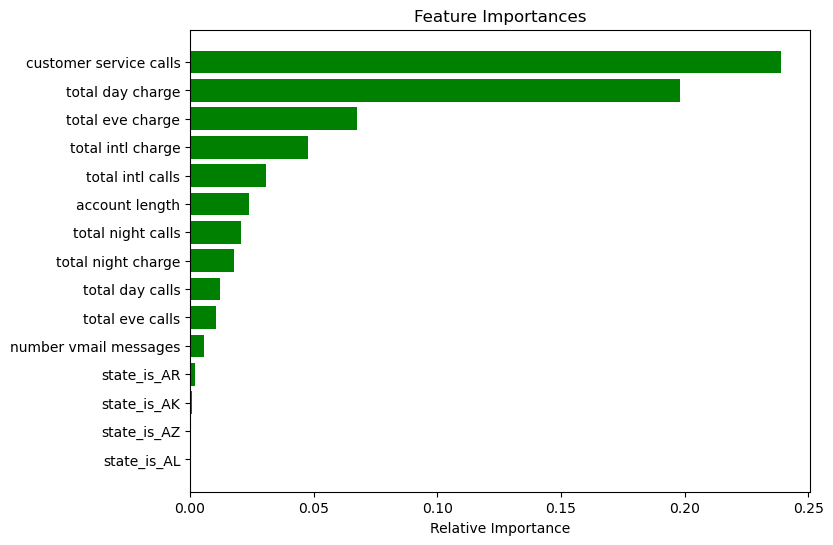

In [39]:
feature_names = list(X_train_over.columns)
importances = decision_tree.feature_importances_[0:15]
indices = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [40]:
print(classification_report(y_test, y_pred_dt, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       664
           1       0.62      0.74      0.68       129

    accuracy                           0.89       793
   macro avg       0.79      0.83      0.80       793
weighted avg       0.89      0.89      0.89       793



**************** DECISION TREE CLASSIFIER MODEL RESULTS **************** 
Accuracy score for testing set:  0.88525
F1 score for testing set:  0.67616
Recall score for testing set:  0.73643
Precision score for testing set:  0.625


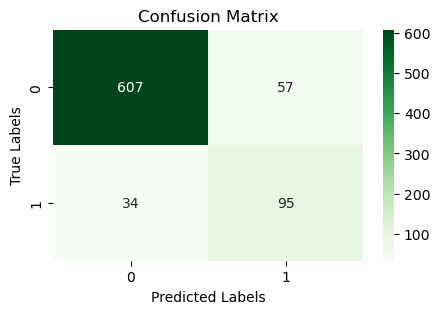

In [41]:
print("**************** DECISION TREE CLASSIFIER MODEL RESULTS **************** ")
print('Accuracy score for testing set: ',round(accuracy_score(y_test,y_pred_dt),5))
print('F1 score for testing set: ',round(f1_score(y_test,y_pred_dt),5))
print('Recall score for testing set: ',round(recall_score(y_test,y_pred_dt),5))
print('Precision score for testing set: ',round(precision_score(y_test,y_pred_dt),5))
cm_dt = confusion_matrix(y_test, y_pred_dt)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm_dt, annot=True, cmap='Greens', fmt='g', ax=ax)
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show();

* According to the decision tree Model, 'customer service calls', 'total day charge' and 'total evening charge' are the three most important for the model.
* The accuracy and F1 score for this model is lower than the Random Forest Model

## Models Comparison

### ROC Curve

In [42]:
classifiers = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier()]

# Initialize result_table
result_table = pd.DataFrame(columns=['classifiers', 'fpr', 'tpr', 'auc'])

for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_test, yproba)
    auc = roc_auc_score(y_test, yproba)
    
    # Use pd.concat to append the new row
    result_table = pd.concat([result_table, pd.DataFrame({'classifiers': [cls.__class__.__name__],
                                                          'fpr': [fpr],
                                                          'tpr': [tpr],
                                                          'auc': [auc]})], ignore_index=True)

# Print the result_table to verify
print(result_table)

              classifiers                                                fpr  \
0      LogisticRegression  [0.0, 0.0, 0.0015060240963855422, 0.0015060240...   
1  DecisionTreeClassifier                    [0.0, 0.06475903614457831, 1.0]   
2  RandomForestClassifier  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                 tpr       auc  
0  [0.0, 0.007751937984496124, 0.0077519379844961...  0.799862  
1                     [0.0, 0.6976744186046512, 1.0]  0.816458  
2  [0.0, 0.007751937984496124, 0.0542635658914728...  0.896330  


* The ROC curve illustrates the true positive rate against the false positive rate of our Models.

### Model Comparisons - F1 Score (10-fold cross-validated)

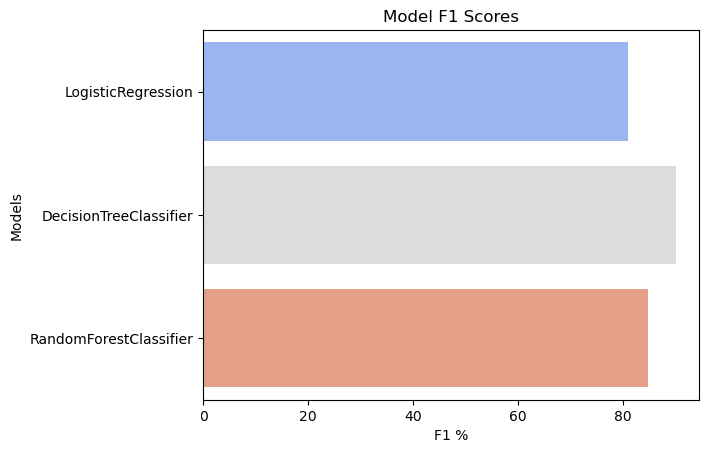

In [43]:
classifiers = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier()]

# Initialize results DataFrame
results = pd.DataFrame(columns=["Models", "F1"])

for model in classifiers:
    names = model.__class__.__name__
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1 = cross_val_score(model, X_test, y_test, cv=10, scoring="f1_weighted").mean()
    result = pd.DataFrame([[names, f1 * 100]], columns=["Models", "F1"])
    
    # Use pd.concat to add new rows to results DataFrame
    results = pd.concat([results, result], ignore_index=True)

# Plot the results
sns.barplot(x='F1', y='Models', data=results, palette="coolwarm")
plt.xlabel('F1 %')
plt.ylabel('Models')
plt.title('Model F1 Scores')
plt.show()

### **10. REGRESSION RESULTS**

In [44]:
results.sort_values(by="F1",ascending=False)

Models         F1
1  DecisionTreeClassifier  90.111197
2  RandomForestClassifier  84.832549
0      LogisticRegression  81.077623

### **11. CONCLUSION**

Looking at the results, we can see that Decision Tree Model performed well on our dataset compared to the Random Forest Model and Logistic Regression Model.

### **12. RECOMMENDATION**

Based on the findings, it is recommended to focus on the Decision Tree Model for predicting customer churn in the telecom sector. This model has shown superior performance on the dataset. While the Random Forest and the Logistic regression did not perform as well, further exploration into advanced feature engineering and threshold adjustments could potentially enhance their effectiveness. 